## Import Libraries & Load Dataset

In [11]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

## Tesla Dataset

In [12]:
data = pd.read_csv("/content/drive/MyDrive/Stock/Tesla.csv - Tesla.csv.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [13]:
data = data[["Date","Close"]]
data.head()

,Date,Close
0,6/29/2010,23.889999
1,6/30/2010,23.830000
2,7/1/2010,21.959999
3,7/2/2010,19.200001
4,7/6/2010,16.110001


In [14]:
data["Date"] = pd.to_datetime(data["Date"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


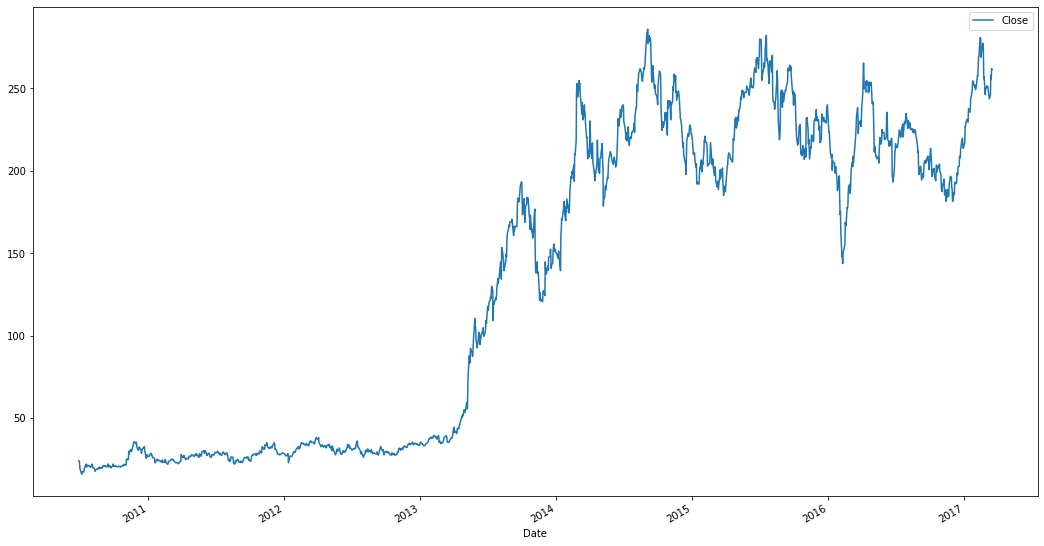

In [15]:
data.set_index("Date").plot(figsize=(18,10))

data = data.rename(columns={
    "Date":"ds",
    "Close":"y"
})

# Model
## fbprophet

In [17]:
prophet = Prophet()
prophet.fit(data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
future = prophet.make_future_dataframe(periods=180,freq="D")
forecast = prophet.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1867,2017-09-09,218.177963,208.146789,258.187352,210.314150,226.216270,13.846705,13.846705,13.846705,2.773729,2.773729,2.773729,11.072977,11.072977,11.072977,0.0,0.0,0.0,232.024668
1868,2017-09-10,218.165586,206.432286,256.680151,210.246150,226.250311,13.966137,13.966137,13.966137,2.773729,2.773729,2.773729,11.192408,11.192408,11.192408,0.0,0.0,0.0,232.131723
1869,2017-09-11,218.153210,204.687414,254.543007,210.179699,226.393928,10.073681,10.073681,10.073681,-1.221495,-1.221495,-1.221495,11.295176,11.295176,11.295176,0.0,0.0,0.0,228.226891
1870,2017-09-12,218.140833,206.728518,252.137362,210.108819,226.501085,10.459960,10.459960,10.459960,-0.918177,-0.918177,-0.918177,11.378138,11.378138,11.378138,0.0,0.0,0.0,228.600793
1871,2017-09-13,218.128456,205.175469,256.848701,210.039491,226.537562,10.410662,10.410662,10.410662,-1.027745,-1.027745,-1.027745,11.438407,11.438407,11.438407,0.0,0.0,0.0,228.539118


Text(0.5, 1.0, 'Tesla price stock forecasting')

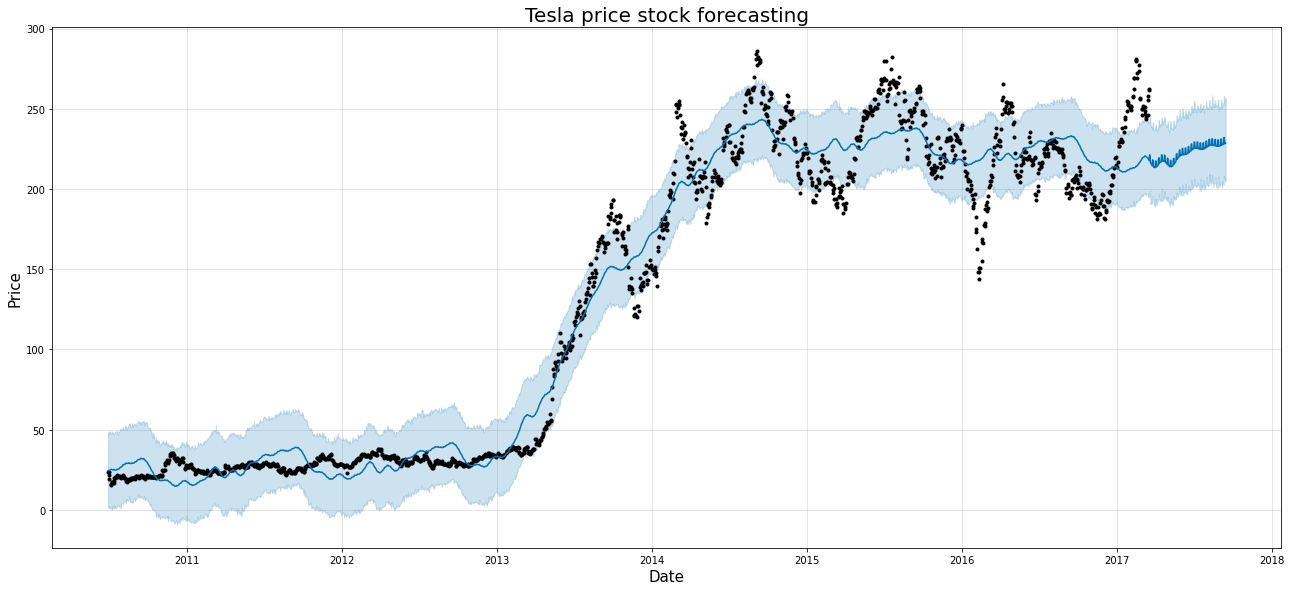

In [19]:
prophet.plot(forecast,figsize=(18,8))
plt.xlabel("Date",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.title("Tesla price stock forecasting",fontsize=20)

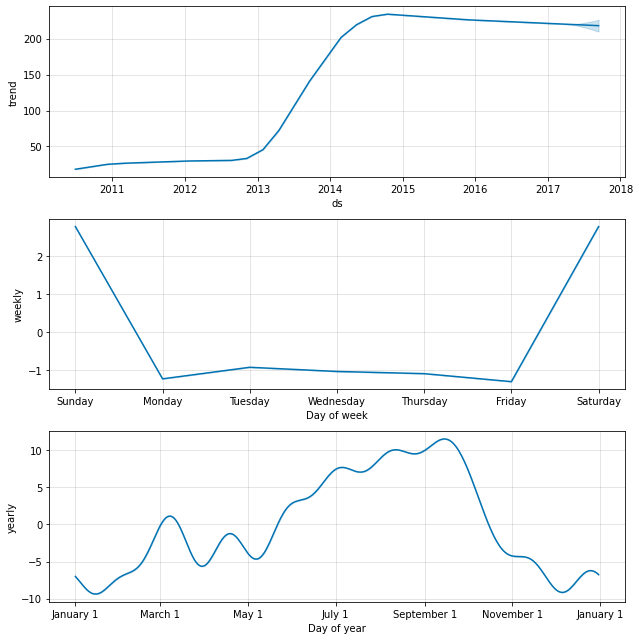

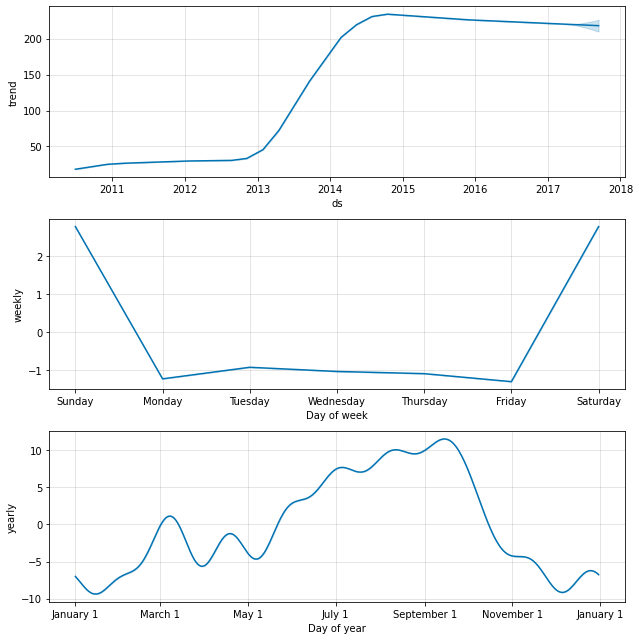

In [20]:
prophet.plot_components(forecast)